In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv")



In [4]:
# Check the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB
None


In [5]:
# Get a list of all unique countries in the dataset
all_countries = data['LOCATION'].unique()

# Print the list of all countries
print(all_countries)


['AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CYP' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL'
 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MLT' 'NLD' 'NOR' 'NZL'
 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'TUR' 'USA']


In [7]:
# Count number of years available for each country
country_years = data.groupby('LOCATION')['TIME'].nunique().sort_values()

print(country_years)


LOCATION
CHL     3
BRA     5
COL     5
MLT     7
TUR    11
HRV    11
CRI    11
CHE    12
ISR    15
BGR    16
LTU    18
LVA    18
ROU    19
CYP    19
POL    20
SVN    20
EST    23
MEX    23
SVK    23
NZL    24
HUN    28
CZE    32
AUT    32
GRC    34
ITA    35
USA    35
GBR    36
FRA    36
JPN    38
ESP    38
DNK    43
LUX    45
PRT    45
BEL    47
IRL    47
AUS    50
NLD    51
DEU    51
FIN    52
SWE    52
NOR    52
CAN    53
KOR    53
ISL    53
Name: TIME, dtype: int64


In [8]:
# Count how many countries have data for each year
year_counts = data.groupby('TIME')['LOCATION'].nunique().sort_values()

print(year_counts)


TIME
2022     7
1974    11
1973    11
1970    11
1971    11
1972    11
1975    13
1976    14
1977    14
1978    14
1979    14
1981    18
1982    18
1983    18
1980    19
1984    19
1986    19
1985    20
1987    20
1998    21
1989    21
1988    21
1991    23
1992    23
1993    23
1997    24
1999    24
1990    25
2001    25
2000    25
1996    25
1995    25
1994    25
2002    27
2003    31
2009    33
2004    34
2005    34
2010    34
2008    34
2006    35
2007    35
2021    36
2011    36
2012    37
2013    39
2014    40
2018    40
2020    40
2015    41
2016    41
2017    41
2019    41
Name: LOCATION, dtype: int64


The best period for analysis is 2010–2021 because:
It has the highest number of countries (41+) with data.
It's recent and relevant for current trends.
It avoids gaps from earlier years with fewer countries.

In [9]:
# Filter data for the years 2010-2021
filtered_data = data[(data['TIME'] >= 2010) & (data['TIME'] <= 2021)]

# Check the number of countries remaining
print(filtered_data['LOCATION'].nunique())

# Preview the filtered dataset
print(filtered_data.head())


42
   LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
39      AUS  2010       15.630   1.316  561.659     12374.33
40      AUS  2011       15.311   1.307  583.222     13029.19
41      AUS  2012       15.308   1.328  589.993     13412.59
42      AUS  2013       14.345   1.255  586.402     13562.38
43      AUS  2014       12.498   1.229  569.455     13368.35


Why This Selection Makes Sense:
Ensures comparability – All included countries have data for at least 10 years.
Maximizes insights – Captures both short-term and long-term trends.
Avoids missing values – Reduces inconsistencies from countries with sparse data.

#  How GDP impacts pharmaceutical spending across countries

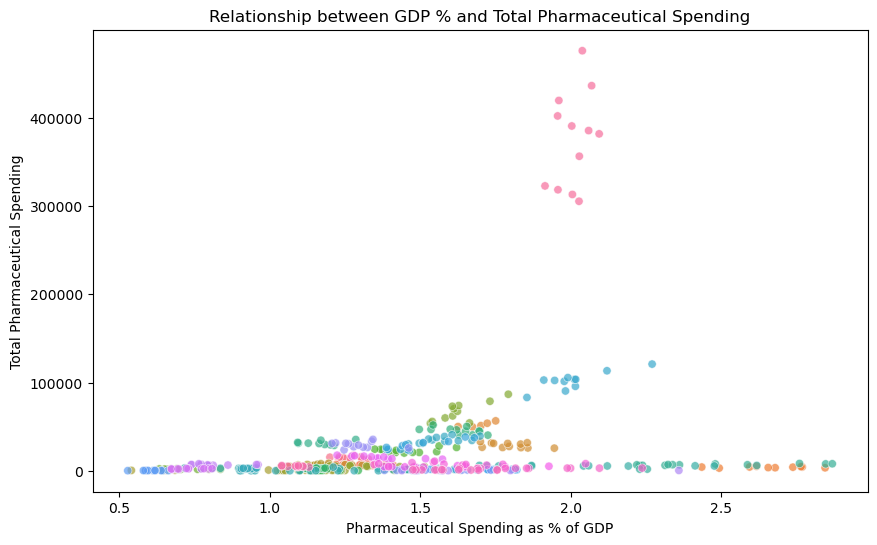

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Pharmaceutical Spending vs. GDP percentage
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_data, x="PC_GDP", y="TOTAL_SPEND", hue="LOCATION", alpha=0.7)
plt.xlabel("Pharmaceutical Spending as % of GDP")
plt.ylabel("Total Pharmaceutical Spending")
plt.title("Relationship between GDP % and Total Pharmaceutical Spending")
plt.legend([],[], frameon=False)  # Hide legend for clarity
plt.show()


Observations
Upward Trend – There's a general increase in total spending as the pharmaceutical spending % of GDP rises.
Clusters – Some countries have significantly higher spending, possibly larger economies like the US.
Outliers – The high-value points at ~2% GDP with extreme spending likely belong to the US or other major economies.

In [14]:
import numpy as np

# Calculate correlation
correlation = np.corrcoef(filtered_data["PC_GDP"], filtered_data["TOTAL_SPEND"])[0,1]
print(f"Correlation between Pharmaceutical spending as GDP% and Total Pharmaceutical Spending: {correlation:.2f}")


Correlation between Pharmaceutical spending as GDP% and Total Pharmaceutical Spending: 0.29


Weak correlation suggests that while GDP percentage spent on pharmaceuticals increases, the total spending does not strongly follow a predictable pattern.
Other factors, such as population size, healthcare policies, or economic structure, may be influencing pharmaceutical spending.
Some outliers (high spenders) could be skewing the data.

So next steps would be:
Visualizing Trends Over Time, does this relationship change over years?
We can create a line plot to see GDP % vs. Total Spend over time.

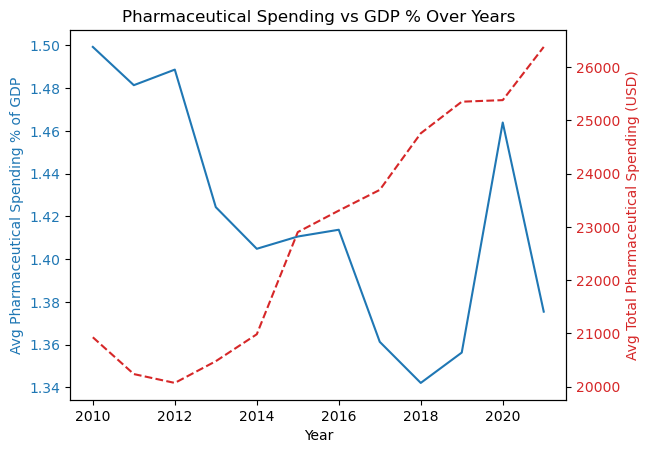

In [12]:
# Group by year and take mean values
yearly_trends = filtered_data.groupby("TIME")[["PC_GDP", "TOTAL_SPEND"]].mean()

# Plot trends
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Pharmaceutical Spending % of GDP", color="tab:blue")
ax1.plot(yearly_trends.index, yearly_trends["PC_GDP"], color="tab:blue", label="PC_GDP %")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Avg Total Pharmaceutical Spending (USD)", color="tab:red")
ax2.plot(yearly_trends.index, yearly_trends["TOTAL_SPEND"], color="tab:red", linestyle="dashed", label="Total Spend")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Pharmaceutical Spending vs GDP % Over Years")
plt.show()


PC_GDP % (blue line) has fluctuated but generally declined from 2010 to 2018, before rising again around 2020.
Total Pharmaceutical Spending (red dashed line) has steadily increased, despite dips in GDP %.
This suggests that, over time, countries are spending more on pharmaceuticals in absolute terms, even if their GDP % allocation varies.

In [15]:
#dentify countries that are extreme outliers

# Find top outliers based on TOTAL_SPEND
top_spenders = filtered_data.nlargest(5, "TOTAL_SPEND")
print(top_spenders[["LOCATION", "TIME", "PC_GDP", "TOTAL_SPEND"]])


     LOCATION  TIME  PC_GDP  TOTAL_SPEND
1340      USA  2021   2.039    475596.74
1339      USA  2020   2.070    436030.19
1338      USA  2019   1.961    419287.86
1337      USA  2018   1.957    401771.09
1336      USA  2017   2.004    390396.57


The USA consistently has the highest total pharmaceutical spending, exceeding $400 billion in recent years.
Their pharmaceutical spending as a % of GDP (PC_GDP) is around 2%, which is not drastically different from other countries, but their absolute spending is significantly higher.
This suggests that total spending is driven by factors beyond just GDP % allocation, that could be higher drug prices, healthcare policies, and demand for pharmaceuticals.

In [16]:
#Compare High vs. Low GDP Countries, do wealthier countries (higher GDP%) spend more?
# Let’s divide countries into high-GDP and low-GDP groups and compare their spending

# Define threshold (median GDP%)
median_gdp = filtered_data["PC_GDP"].median()

high_gdp = filtered_data[filtered_data["PC_GDP"] >= median_gdp]
low_gdp = filtered_data[filtered_data["PC_GDP"] < median_gdp]

# Calculate averages
avg_high_gdp_spending = high_gdp["TOTAL_SPEND"].mean()
avg_low_gdp_spending = low_gdp["TOTAL_SPEND"].mean()

print(f"Avg Pharmaceutical Spending (High GDP Countries): {avg_high_gdp_spending:.2f}")
print(f"Avg Pharmaceutical Spending (Low GDP Countries): {avg_low_gdp_spending:.2f}")


Avg Pharmaceutical Spending (High GDP Countries): 39033.42
Avg Pharmaceutical Spending (Low GDP Countries): 6805.79


High GDP countries spend about $39,033.42 on average, while low GDP countries spend only $6,805.79 on average.
This confirms that absolute pharmaceutical spending is heavily skewed towards wealthier nations, even though the percentage of GDP allocated to pharmaceuticals may be similar.

In [17]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklea

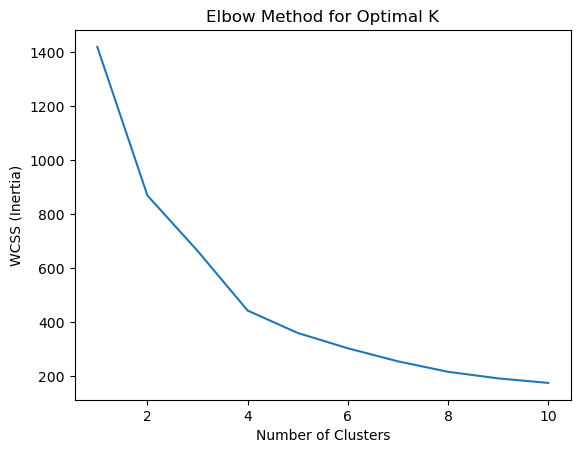

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS (inertia) for different values of K
wcss = []
for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_recent_scaled)  # Use your dataset (X_recent_scaled, X_all_scaled, etc.)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define the features
features = ["PC_GDP", "PC_HEALTHXP", "USD_CAP"]

# Filter the datasets based on the year ranges
recent_years = data[data["TIME"] >= 2010]
all_years = data

# Filter the data for the years 2010-2021
data_2010_2021 = data[(data['TIME'] >= 2010) & (data['TIME'] <= 2021)]

# Prepare the feature sets (drop any NaN values)
X_recent = recent_years[features].dropna()
X_all = all_years[features].dropna()
X_2010_2021 = data_2010_2021[features].dropna()

# Standardize the data
scaler = StandardScaler()
X_recent_scaled = scaler.fit_transform(X_recent)
X_all_scaled = scaler.fit_transform(X_all)
X_2010_2021_scaled = scaler.fit_transform(X_2010_2021)

# Apply KMeans clustering without PCA
kmeans_recent = KMeans(n_clusters=4, random_state=42)
recent_clusters = kmeans_recent.fit_predict(X_recent_scaled)

kmeans_all = KMeans(n_clusters=4, random_state=42)
all_clusters = kmeans_all.fit_predict(X_all_scaled)

kmeans_2010_2021 = KMeans(n_clusters=4, random_state=42)
clusters_2010_2021 = kmeans_2010_2021.fit_predict(X_2010_2021_scaled)

# You can now assign the cluster labels back to your original dataset
recent_years['Cluster'] = recent_clusters
all_years['Cluster'] = all_clusters
data_2010_2021['Cluster'] = clusters_2010_2021

# You can now analyze or visualize the clusters


c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kaurp\AppData\Local\Temp\ipykernel_13564\3007790775.py:36: Se

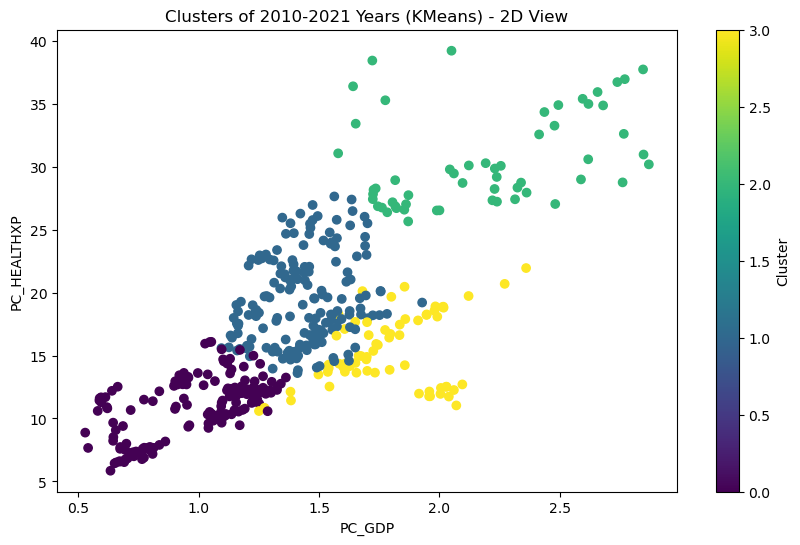

In [31]:
import matplotlib.pyplot as plt

# 2D scatter plot with PC_GDP and PC_HEALTHXP
plt.figure(figsize=(10, 6))
plt.scatter(X_2010_2021['PC_GDP'], X_2010_2021['PC_HEALTHXP'], c=clusters_2010_2021, cmap='viridis')
plt.title("Clusters of 2010-2021 Years (KMeans) - 2D View")
plt.xlabel("PC_GDP")
plt.ylabel("PC_HEALTHXP")
plt.colorbar(label="Cluster")
plt.show()


In [32]:
# Filter the dataset for countries between 2010 and 2021
filtered_all_countries = data[(data['TIME'] >= 2010) & (data['TIME'] <= 2021)]

# Check the number of countries remaining after filtering
print(filtered_all_countries['LOCATION'].nunique())

# Preview the filtered dataset
print(filtered_all_countries.head())


42
   LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND  Cluster
39      AUS  2010       15.630   1.316  561.659     12374.33        3
40      AUS  2011       15.311   1.307  583.222     13029.19        0
41      AUS  2012       15.308   1.328  589.993     13412.59        0
42      AUS  2013       14.345   1.255  586.402     13562.38        3
43      AUS  2014       12.498   1.229  569.455     13368.35        3


# Extreme outliers based on TOTAL_SPEND

     LOCATION  TIME  PC_GDP  TOTAL_SPEND
1340      USA  2021   2.039    475596.74
1339      USA  2020   2.070    436030.19
1338      USA  2019   1.961    419287.86
1337      USA  2018   1.957    401771.09
1336      USA  2017   2.004    390396.57


C:\Users\kaurp\AppData\Local\Temp\ipykernel_7268\1290833823.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['outlier_cluster'] = dbscan.fit_predict(X_scaled)


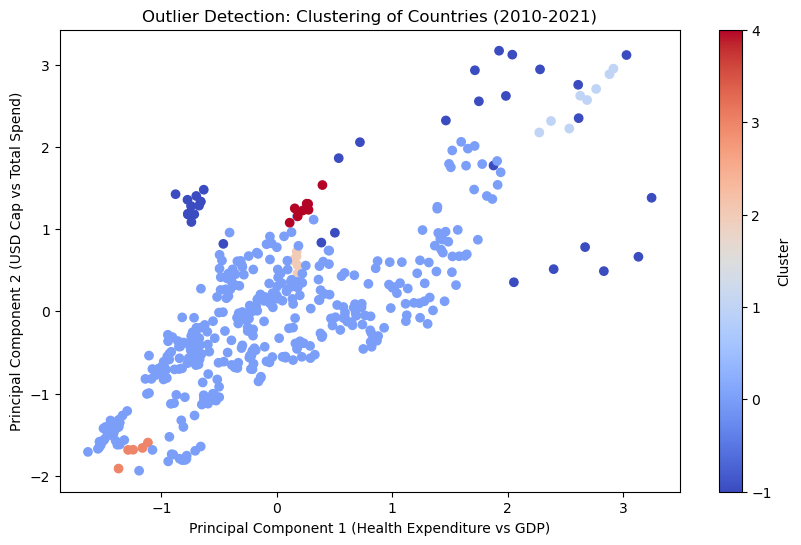

In [46]:
from sklearn.cluster import DBSCAN

# Step 1: Filter data for 2010-2021
filtered_data = data[(data['TIME'] >= 2010) & (data['TIME'] <= 2021)]

# Step 2: Identify top outliers based on TOTAL_SPEND
top_spenders = filtered_data.nlargest(5, "TOTAL_SPEND")
print(top_spenders[["LOCATION", "TIME", "PC_GDP", "TOTAL_SPEND"]])

# Step 3: Apply DBSCAN clustering for outlier detection
features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
X = filtered_data[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
filtered_data['outlier_cluster'] = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the clustering results with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=filtered_data['outlier_cluster'], cmap='coolwarm', marker='o')
plt.title("Outlier Detection: Clustering of Countries (2010-2021)")
plt.xlabel("Principal Component 1 (Health Expenditure vs GDP)")
plt.ylabel("Principal Component 2 (USD Cap vs Total Spend)")
plt.colorbar(label="Cluster")
plt.show()


country like the United States appears as an outlier with high total spending and high per capita spending, it might indicate a high-cost healthcare system.

Conversely, a country with low total spending and low per capita spending might indicate a healthcare system with limited resources or lower costs.

# Filter the data for different time periods (e.g., 2010-2013, 2014-2017, 2018-2021)

c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kaurp\AppData\Local\Temp\ipykernel_7268\741234418.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010_2013['Cluster'] = kmeans_2010_2013.fit_predict(X_2010_2013_scaled)
c:\Users\kaurp\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envi

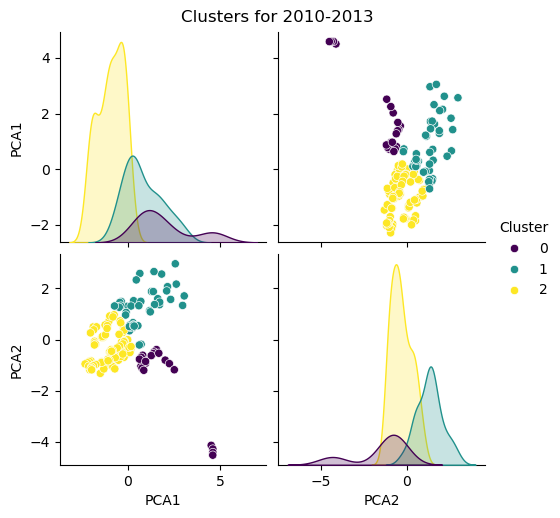

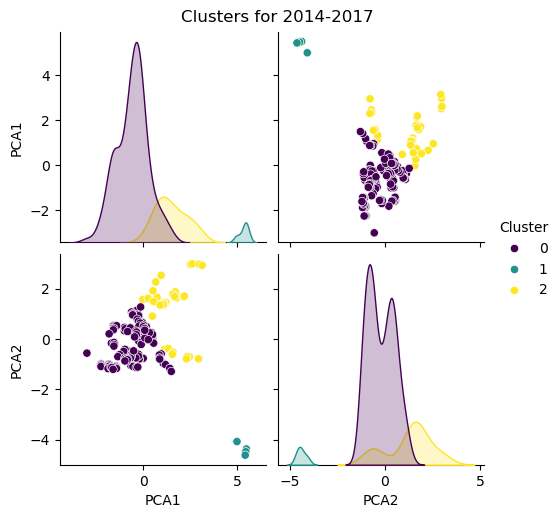

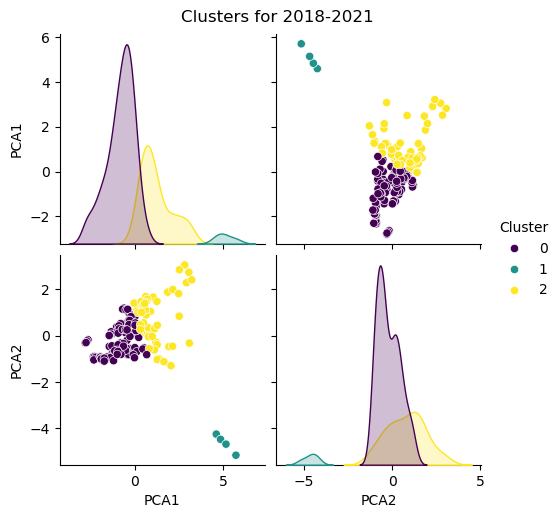

In [48]:
# 1. Filter the data for different time periods (e.g., 2010-2013, 2014-2017, 2018-2021)
data_2010_2013 = filtered_data[(filtered_data['TIME'] >= 2010) & (filtered_data['TIME'] <= 2013)]
data_2014_2017 = filtered_data[(filtered_data['TIME'] >= 2014) & (filtered_data['TIME'] <= 2017)]
data_2018_2021 = filtered_data[(filtered_data['TIME'] >= 2018) & (filtered_data['TIME'] <= 2021)]

# 2. Select features for clustering (you can add more features if needed)
features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

# 3. Scale the features (important for clustering algorithms like KMeans)
scaler = StandardScaler()
X_2010_2013_scaled = scaler.fit_transform(data_2010_2013[features])
X_2014_2017_scaled = scaler.fit_transform(data_2014_2017[features])
X_2018_2021_scaled = scaler.fit_transform(data_2018_2021[features])

# 4. Apply KMeans clustering
kmeans_2010_2013 = KMeans(n_clusters=3, random_state=42)
kmeans_2014_2017 = KMeans(n_clusters=3, random_state=42)
kmeans_2018_2021 = KMeans(n_clusters=3, random_state=42)

# Fit the model
data_2010_2013['Cluster'] = kmeans_2010_2013.fit_predict(X_2010_2013_scaled)
data_2014_2017['Cluster'] = kmeans_2014_2017.fit_predict(X_2014_2017_scaled)
data_2018_2021['Cluster'] = kmeans_2018_2021.fit_predict(X_2018_2021_scaled)

# 5. Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_2010_2013_pca = pca.fit_transform(X_2010_2013_scaled)
X_2014_2017_pca = pca.fit_transform(X_2014_2017_scaled)
X_2018_2021_pca = pca.fit_transform(X_2018_2021_scaled)

# Add PCA components to the data for easy plotting
data_2010_2013['PCA1'], data_2010_2013['PCA2'] = X_2010_2013_pca[:, 0], X_2010_2013_pca[:, 1]
data_2014_2017['PCA1'], data_2014_2017['PCA2'] = X_2014_2017_pca[:, 0], X_2014_2017_pca[:, 1]
data_2018_2021['PCA1'], data_2018_2021['PCA2'] = X_2018_2021_pca[:, 0], X_2018_2021_pca[:, 1]

# 6. Create a pairplot for visualizing the clusters over time
sns.pairplot(data_2010_2013, hue='Cluster', vars=['PCA1', 'PCA2'], palette='viridis')
plt.suptitle("Clusters for 2010-2013", y=1.02)
plt.show()

sns.pairplot(data_2014_2017, hue='Cluster', vars=['PCA1', 'PCA2'], palette='viridis')
plt.suptitle("Clusters for 2014-2017", y=1.02)
plt.show()

sns.pairplot(data_2018_2021, hue='Cluster', vars=['PCA1', 'PCA2'], palette='viridis')
plt.suptitle("Clusters for 2018-2021", y=1.02)
plt.show()


In [55]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Filter data for countries between 2010 and 2021
filtered_data = data[(data['TIME'] >= 2010) & (data['TIME'] <= 2021)]

# Select the features you want to scale (e.g., PC_HEALTHXP, PC_GDP, etc.)
features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

# Scale the data (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[features])

# Perform PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

# Add the PCA components to the filtered dataset
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df['Country'] = filtered_data['LOCATION'].values  # Ensure this matches the filtered data
pca_df['Cluster'] = kmeans.labels_  # Assuming kmeans.labels_ is already computed

# Create the interactive scatter plot using Plotly
fig = px.scatter(pca_df, x="PCA1", y="PCA2", color="Cluster", hover_data=["Country"],
                 title="Interactive PCA Plot with Clustering", labels={"Cluster": "Cluster ID"})

# Show the plot
fig.show()


# Trend Comparison of Key Features Over Time (2010-2021 vs. Earlier Years)
We can show how the trends in health expenditure, GDP, and total spend have evolved from 2010 to 2021 compared to earlier years.
Insight: This comparison could help demonstrate whether there is a significant shift or trend in recent years that might not be apparent in the earlier years.
Using line plots to show how these metrics have changed for a few key countries, highlighting differences between 2010-2021 and earlier years.

In [56]:
import plotly.express as px

# Filter data for years before 2010
early_years_data = data[data['TIME'] < 2010]
recent_years_data = filtered_data  # already filtered to 2010-2021

# Plot trend comparison between 2010-2021 and earlier years for 'TOTAL_SPEND' (as an example)
fig = px.line(
    pd.concat([early_years_data[['TIME', 'LOCATION', 'TOTAL_SPEND']], recent_years_data[['TIME', 'LOCATION', 'TOTAL_SPEND']]]),
    x="TIME",
    y="TOTAL_SPEND",
    color="LOCATION",
    title="Trend Comparison: Total Spend (2010-2021 vs Earlier Years)",
    labels={"TOTAL_SPEND": "Total Spending", "TIME": "Year"}
)
fig.show()


# Yearly Comparison of GDP, Health Expenditure, and Spending (2010-2021 Focus)
By narrowing down to 2010-2021, we can show how the features are distributed and how countries perform in terms of GDP, health expenditure, and spending during this period, making it clear why focusing on recent data gives a snapshot of current trends.
This will emphasize how current trends are central to understanding present-day dynamics and decision-making.
Using scatter plots to compare GDP vs. Total Spend and Health Expenditure vs. Total Spend for countries in 2010-2021.

In [58]:
# Scatter plot for GDP vs Total Spending (2010-2021)
fig = px.scatter(recent_years_data, x="PC_GDP", y="TOTAL_SPEND", color="LOCATION",
                 title="GDP vs Total Spending (2010-2021)", labels={"PC_GDP": "GDP (PC)", "TOTAL_SPEND": "Total Spending"})
fig.show()

# Scatter plot for Health Expenditure vs Total Spending (2010-2021)
fig = px.scatter(recent_years_data, x="PC_HEALTHXP", y="TOTAL_SPEND", color="LOCATION",
                 title="Health Expenditure vs Total Spending (2010-2021)", labels={"PC_HEALTHXP": "Health Expenditure", "TOTAL_SPEND": "Total Spending"})
fig.show()


# Global Comparison: Total Spend of Top Countries (2010-2021)
By comparing the countries with the highest total spend between 2010 and 2021, you can show that the most important countries (in terms of spending) are represented in the filtered dataset.
Countries with significant spending patterns will help justify that the 2010-2021 period captures the most relevant data.
Create=ing an interactive bar plot showing the total spend for countries between 2010 and 2021.

In [59]:
# Aggregate total spend by country for 2010-2021
country_spend = recent_years_data.groupby('LOCATION')['TOTAL_SPEND'].sum().sort_values(ascending=False)

# Bar plot for top countries by total spending
fig = px.bar(country_spend.head(10), x=country_spend.head(10).index, y=country_spend.head(10),
             title="Top 10 Countries by Total Spending (2010-2021)", labels={"TOTAL_SPEND": "Total Spending", "LOCATION": "Country"})
fig.show()


# Comparison of Spending and GDP: Correlation Over Time (2010-2021 Focus)
We can examine how GDP and spending have been correlated in the most recent years. This can help demonstrate that the 2010-2021 period is highly representative of how economies are currently evolving.
 Shows the relationship between GDP and spending across countries during the most recent period.
Created a correlation matrix for GDP and total spending for countries from 2010 to 2021.


In [60]:
import plotly.express as px

# Correlation matrix plot for GDP and Total Spending
corr_matrix = recent_years_data[['PC_GDP', 'TOTAL_SPEND']].corr()

fig = px.imshow(corr_matrix, text_auto=True, title="Correlation Matrix (2010-2021)", labels={"x": "Variables", "y": "Variables"})
fig.show()
